63741


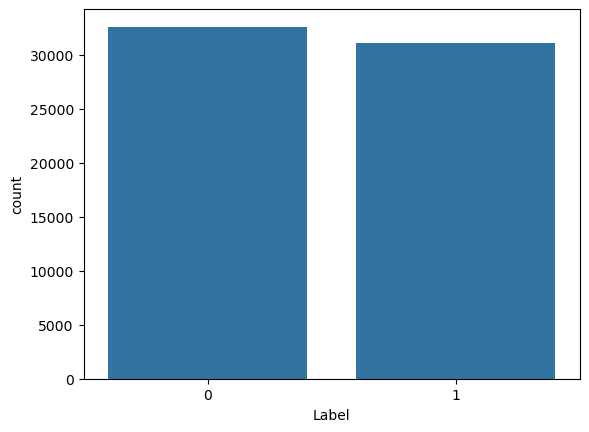

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
# Read the main training dataset
df = pd.read_csv("training_ds1.csv")
df.rename(columns={'label': 'Label', "text": "X"}, inplace=True)

# Read and concatenate additional datasets
df2 = pd.read_csv("train.csv")
df2.rename(columns={'Class': 'Label', "Tweet": "X"}, inplace=True)
df2['Label'] = np.where(df2['Label'] == 'normal', 0, 1)
df = pd.concat([df, df2], ignore_index=True)

df3 = pd.read_csv("test.csv")
df3.rename(columns={'Class': 'Label', "Tweet": "X"}, inplace=True)
df3['Label'] = np.where(df3['Label'] == 'normal', 0, 1)
df = pd.concat([df, df3], ignore_index=True)

train_pos = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None)
train_neg = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv', sep='\t', header=None)
test_pos = pd.read_csv('test_Arabic_tweets_positive_20190413.tsv', sep='\t', header=None)
test_neg = pd.read_csv('test_Arabic_tweets_negative_20190413.tsv', sep='\t', header=None)

data = pd.concat([train_pos, train_neg, test_pos, test_neg])
data.columns = ['Label', 'X']
data['Label'] = np.where(data['Label'] == 'neg', 1, 0)

df = pd.concat([df, data], ignore_index=True)

# Visualize the distribution of labels
sns.countplot(x="Label", data=df)
print(len(df))

In [2]:
import pandas as pd

# Step 1: Read the text file
with open('arabic-bad-words-list_text-file_one-word-per-line.txt', 'r', encoding='utf-8') as file:
    sentences = file.readlines()

sentences = [sentence.strip() for sentence in sentences]

df4 = pd.DataFrame(sentences, columns=['X'])

df4['Label'] = 1

In [3]:
df = pd.concat([df, df4], ignore_index=True)

In [4]:
arabic_nltk = df.copy()

In [5]:
print(df.duplicated().sum().sum())  # Number Of Dupliactes Before Delete
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum().sum()) # Number Of Dupliactes After Delete

21014
0


In [6]:

import re
df['X'] = df['X'].apply(lambda x: re.sub(r'http\S+', '', x)) # remove URLs
df['X'] = df['X'].apply(lambda x: re.sub(r'@\S+', '', x)) # remove mentions
df['X'] = df['X'].apply(lambda x: re.sub(r'#\S+', '', x)) # remove hashtags
print(df.head())



                                                   X  Label
0  مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...      0
1  كلنا بره ومش هنبطل نزايد على العجايز الي جابون...      1
2          بدل ما انت قاعد بره كده تعالي ازرع الصحرا      0
3      قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان      1
4  وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...      1


In [7]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
import string
st = ISRIStemmer()

stop_words = stopwords.words('arabic')


df['tokenized_text'] = df['X'].apply(lambda x: word_tokenize(x.lower()))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])



# lemmatizer = WordNetLemmatizer()
# df['lemmatized_text'] = df['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



df['stemmed_text'] = df['filtered_text'].apply(lambda x: [st.stem(word) for word in x])

df['processed_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
df['processed_text'] = df['processed_text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [49]:
from sklearn.model_selection import train_test_split
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(df["X"], y, test_size=0.3, random_state=42,stratify=y)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


tfidf = TfidfVectorizer(analyzer='char_wb',ngram_range=(3,10))

In [50]:
from sklearn.svm import LinearSVC

MySVC = LinearSVC()

ModelSVC = Pipeline([
    ('tfidf', tfidf),
    ('clf', MySVC)
])

ModelSVC.fit(X_train, y_train)
PredictionSVC = ModelSVC.predict(X_test)


/home/ibrahim-ahmed/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [51]:
from sklearn.linear_model import LogisticRegression

ModelUsingLG = Pipeline([
    ('tfidf' , MyTF_IDF) , 
    ('LG', LogisticRegression())])


ModelUsingLG.fit(X_train,y_train)
PredictionLG = ModelUsingLG.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print("Using Linear SVC : ")
print(classification_report(y_test , PredictionSVC))
print("*"*20)
print()



print("Using Logistic Regression : ")
print(classification_report(y_test , PredictionLG))
print("*"*20)
print()

Using Linear SVC : 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3225
           1       0.88      0.88      0.88      3251

    accuracy                           0.88      6476
   macro avg       0.88      0.88      0.88      6476
weighted avg       0.88      0.88      0.88      6476

********************

Using Logistic Regression : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3225
           1       0.86      0.85      0.85      3251

    accuracy                           0.85      6476
   macro avg       0.85      0.85      0.85      6476
weighted avg       0.85      0.85      0.85      6476

********************



In [53]:
y_scores = ModelSVC.decision_function(X_test)

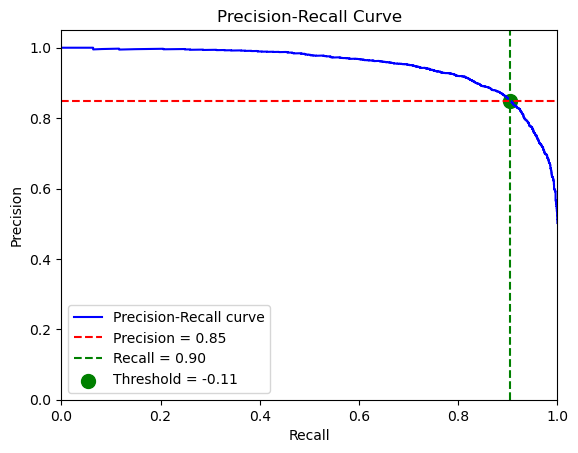

Selected Threshold: -0.11
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3225
           1       0.85      0.90      0.88      3251

    accuracy                           0.87      6476
   macro avg       0.87      0.87      0.87      6476
weighted avg       0.87      0.87      0.87      6476



In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


plt.figure()
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')



desired_precision = 0.93
threshold_index = next(i for i, p in enumerate(precision) if p >= desired_precision)
threshold = thresholds[threshold_index]



plt.axhline(y=desired_precision, color='r', linestyle='--', label=f'Precision = {desired_precision:.2f}')
plt.axvline(x=recall[threshold_index], color='g', linestyle='--', label=f'Recall = {recall[threshold_index]:.2f}')
plt.scatter(recall[threshold_index], desired_precision, color='g', s=100, label=f'Threshold = {threshold:.2f}')
plt.legend()

plt.show()


y_pred = (y_scores > threshold).astype(int)


print(f"Selected Threshold: {threshold:.2f}")
print(classification_report(y_test, y_pred))


In [56]:
import xgboost as xgb


ModelXGB = Pipeline([('tfidf' , MyTF_IDF) , ('XGB', xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=123)
)])
ModelXGB.fit(X_train, y_train)
PredictionXGB = ModelXGB.predict(X_test)

In [57]:
print("Using XGB : ")
print(classification_report(y_test , PredictionXGB))
print("*"*20)
print()

Using XGB : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3225
           1       0.95      0.80      0.87      3251

    accuracy                           0.88      6476
   macro avg       0.89      0.88      0.88      6476
weighted avg       0.89      0.88      0.88      6476

********************



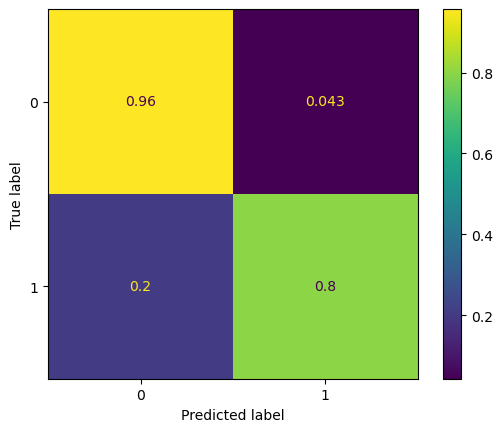

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, PredictionXGB, normalize="true")
plt.show()

In [59]:
XGB_score = ModelXGB.predict_proba(X_test)[:, 1]

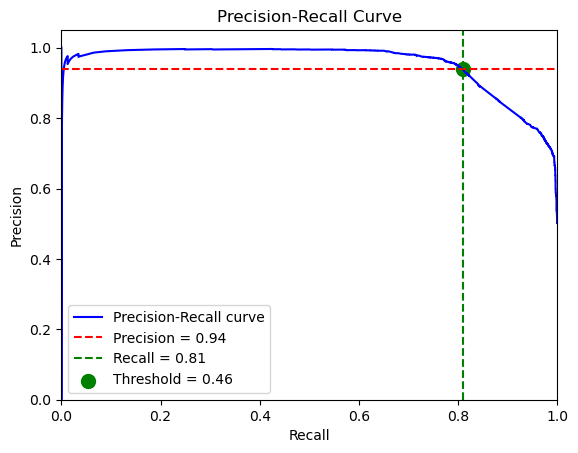

Selected Threshold: 0.46
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3225
           1       0.94      0.81      0.87      3251

    accuracy                           0.88      6476
   macro avg       0.89      0.88      0.88      6476
weighted avg       0.89      0.88      0.88      6476



In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, XGB_score)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

# Example: Identify threshold where precision is at least 0.85
desired_precision = 0.94
threshold_index = next(i for i, p in enumerate(precision) if p >= desired_precision)
threshold = thresholds[threshold_index]

# Plot threshold on the precision-recall curve
plt.axhline(y=desired_precision, color='r', linestyle='--', label=f'Precision = {desired_precision:.2f}')
plt.axvline(x=recall[threshold_index], color='g', linestyle='--', label=f'Recall = {recall[threshold_index]:.2f}')
plt.scatter(recall[threshold_index], desired_precision, color='g', s=100, label=f'Threshold = {threshold:.2f}')
plt.legend()

plt.show()

# Use the selected threshold for classification
y_pred = (XGB_score > threshold).astype(int)

# Evaluate classification
print(f"Selected Threshold: {threshold:.2f}")
print(classification_report(y_test, y_pred))


In [69]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('xgb', ModelXGB),
    ('svc', ModelSVC)
], voting='hard') 

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict using the VotingClassifier
predictions = voting_clf.predict(X_test)


/home/ibrahim-ahmed/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [70]:
print("voting_clf : ")
print(classification_report(y_test , predictions))
print("*"*20)
print()

voting_clf : 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3225
           1       0.96      0.76      0.85      3251

    accuracy                           0.87      6476
   macro avg       0.88      0.87      0.86      6476
weighted avg       0.88      0.87      0.86      6476

********************



In [ ]:
MyTF_IDF_2 = TfidfVectorizer(analyzer='char_wb',ngram_range=(1,3))

In [84]:
from sklearn.svm import LinearSVC

MySVC_2= LinearSVC()

ModelSVC_2 = Pipeline([
    ('tfidf', MyTF_IDF_2),
    ('clf', MySVC_2)
])

ModelSVC_2.fit(X_train, y_train)
PredictionSVC_2 = ModelSVC_2.predict(X_test)

/home/ibrahim-ahmed/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [83]:
from sklearn.linear_model import LogisticRegression

ModelUsingLG_2 = Pipeline([
    ('tfidf' , MyTF_IDF_2) , 
    ('LG', LogisticRegression())])


ModelUsingLG_2.fit(X_train,y_train)
PredictionLG_2 = ModelUsingLG_2.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
print("Using Linear SVC : ")
print(classification_report(y_test , PredictionSVC_2))
print("*"*20)
print()



print("Using Logistic Regression : ")
print(classification_report(y_test , PredictionLG_2))
print("*"*20)
print()

Using Linear SVC : 
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3225
           1       0.88      0.88      0.88      3251

    accuracy                           0.88      6476
   macro avg       0.88      0.88      0.88      6476
weighted avg       0.88      0.88      0.88      6476

********************

Using Logistic Regression : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3225
           1       0.86      0.85      0.85      3251

    accuracy                           0.85      6476
   macro avg       0.85      0.85      0.85      6476
weighted avg       0.85      0.85      0.85      6476

********************



In [77]:
import xgboost as xgb


ModelXGB_2 = Pipeline([('tfidf' , MyTF_IDF) , ('XGB', xgb.XGBClassifier(objective="multi:softmax", num_class=2, random_state=123)
)])
ModelXGB_2.fit(X_train, y_train)
PredictionXGB_2 = ModelXGB_2.predict(X_test)

In [78]:
print("Using XGB : ")
print(classification_report(y_test , PredictionXGB))
print("*"*20)
print()

Using XGB : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3225
           1       0.95      0.80      0.87      3251

    accuracy                           0.88      6476
   macro avg       0.89      0.88      0.88      6476
weighted avg       0.89      0.88      0.88      6476

********************



In [80]:
import joblib

In [82]:
joblib.dump(ModelXGB, 'AR_ModelXGB.pkl')

['AR_ModelXGB.pkl']